In [31]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

Cargar los datos, seleccionar dos columnas para la predicción, escalarlos y partilos en train/test

In [48]:
x, y = datasets.load_iris(as_frame=True, return_X_y=True)
#x = x[["sepal length (cm)","sepal width (cm)"]]

In [49]:
x.head(), y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int32)

In [34]:
scaler = MinMaxScaler()
transformado = scaler.fit_transform(x)

Fit transform devuelve una matriz de numpy, no un dataframe

In [35]:
transformado[0:5]

array([[0.22222222, 0.625     ],
       [0.16666667, 0.41666667],
       [0.11111111, 0.5       ],
       [0.08333333, 0.45833333],
       [0.19444444, 0.66666667]])

Vamos a meter las columnas de la matriz en las del dataframe

In [36]:
x["sepal length (cm)"] = transformado[:,0]
x["sepal width (cm)"] = transformado[:,1]
x.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

Crear el clasificador, uso básico


In [38]:
cla = KNeighborsClassifier(n_neighbors=11)

Entrenarlo con los datos de train

In [39]:
cla.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Predecir con los de test

In [40]:
y_predict = cla.predict(X_test)
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

Para ver la exactitud, proporción de predicciones correctas, con la función de scikit o haciendo el cálculo.

In [41]:
accuracy_score(y_test,y_predict)

0.7368421052631579

In [42]:
(y_test == y_predict).sum()/len(y_test)

0.7368421052631579

Gráfico con los datos de test, incluye la predicción y si acertó o no.

C:\Users\Vespertino\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Predicciones')

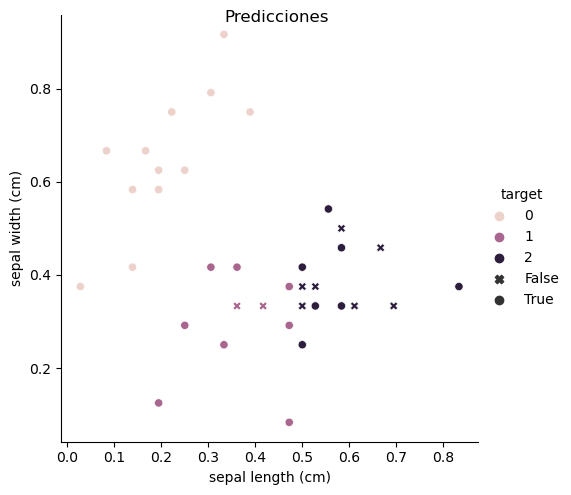

In [43]:
rel = sns.relplot(data = X_test, x ="sepal length (cm)" , y ="sepal width (cm)" , hue = y_predict, style=(y_predict==y_test), markers = ["X","o"])
rel.fig.suptitle('Predicciones')

Para ver las probabilidades al predecir. Para cada fila en X_test, hay una fila de salida. En las filas de salida hay tres columnas, una por cada clase. En la columna 0, está la probabilidad de que pertenezca a la clase 0.

In [44]:
y_predict_proba = cla.predict_proba(X_test)
y_predict_proba[:5]

array([[0.        , 0.81818182, 0.18181818],
       [0.        , 0.72727273, 0.27272727],
       [1.        , 0.        , 0.        ],
       [0.        , 0.09090909, 0.90909091],
       [1.        , 0.        , 0.        ]])

Repetimos con 3 dimensiones

In [56]:
x, y = datasets.load_iris(as_frame=True, return_X_y=True)
scaler = MinMaxScaler()
transformado = scaler.fit_transform(x)
x["sepal length (cm)"] = transformado[:,0]
x["sepal width (cm)"] = transformado[:,1]
x["petal length (cm)"] = transformado[:,2]
x["petal width (cm)"] = transformado[:,3]
x.head()
x.drop(columns= ["petal length (cm)"], inplace = True)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
cla = KNeighborsClassifier(n_neighbors=11)
cla.fit(X_train, y_train)
y_predict = cla.predict(X_test)
accuracy_score(y_test,y_predict)

0.9473684210526315

Gráfico en 3d

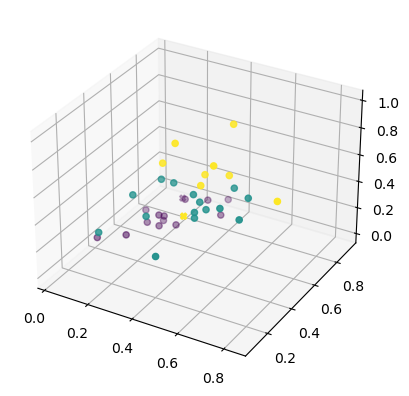

In [57]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
correctos = X_test[y_predict==y_test]
ax.scatter( xs = correctos["sepal length (cm)"] , ys =correctos["sepal width (cm)"], zs=correctos["petal width (cm)"], 
           marker='o', c = y_test[y_predict==y_test])
incorrectos = X_test[y_predict!=y_test]
ax.scatter( xs = incorrectos["sepal length (cm)"] , ys =incorrectos["sepal width (cm)"], zs=incorrectos["petal width (cm)"], 
           marker='X', c = y_test[y_predict!=y_test])

Otra opción es hacer los cálculos en 3D y mostrar en 2D aunque pueda ser inconsistente.
Ahora con las cuatro columnas, mostramos en 2d

In [54]:
x, y = datasets.load_iris(as_frame=True, return_X_y=True)
scaler = MinMaxScaler()
transformado = scaler.fit_transform(x)
x["sepal length (cm)"] = transformado[:,0]
x["sepal width (cm)"] = transformado[:,1]
x["petal length (cm)"] = transformado[:,2]
x["petal width (cm)"] = transformado[:,3]
x.head()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
cla = KNeighborsClassifier(n_neighbors=11)
cla.fit(X_train, y_train)
y_predict = cla.predict(X_test)
accuracy_score(y_test,y_predict)

0.9736842105263158

C:\Users\Vespertino\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Predicciones')

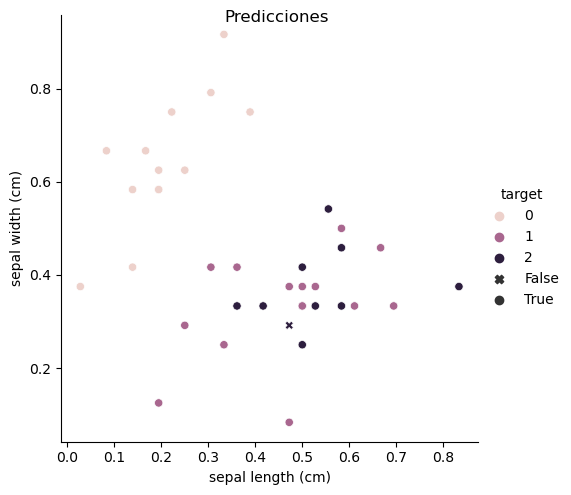

In [55]:
rel = sns.relplot(data = X_test, x ="sepal length (cm)" , y ="sepal width (cm)" , hue = y_predict, style=(y_predict==y_test), markers = ["X","o"])
rel.fig.suptitle('Predicciones')